In [6]:
# group different basins in one node
# after part2 simulations are done, if we want to check other evaluation metrics, this script can be run to do the evaluation

import numpy as np
import os, glob, sys, toml
from run_one_paramset_Derecho import *
from mo_evaluation import mo_evaluate_return_many_metrics

if __name__ == '__main__':

    # configfile = sys.argv[1]
    # iterflag = int(sys.argv[2])
    # trialflag = int(sys.argv[3])

    for basin in range(10):
        print('basin', basin)
                   
        configfile = f'/glade/work/guoqiang/CTSM_CAMELS/Calib_HH_MOASMO/configuration/_level1-{basin}_config_MOASMO.toml'
        iterflag = 0
    
        for trialflag in range(400):
            if np.mod(trialflag, 100)==0:
                print(trialflag)
        
            config = toml.load(configfile)
        
            # inputs
            path_CTSM_base = config['path_CTSM_case']
            ref_streamflow = config['file_Qobs']
            
            if 'add_flow_file' in config:
                add_flow_file = config['add_flow_file']
            else:
                add_flow_file = 'NA'
        
        
            # evaluation period
            RUN_STARTDATE = config['RUN_STARTDATE']
            ignore_month = config['ignore_month']
            STOP_OPTION = config['STOP_OPTION']
            STOP_N = config['STOP_N']
        
            date_start = (pd.Timestamp(RUN_STARTDATE) + pd.offsets.DateOffset(months=ignore_month)).strftime('%Y-%m-%d') # ignor the first year when evaluating model
            if STOP_OPTION == 'nyears':
                date_end = (pd.Timestamp(RUN_STARTDATE) + pd.offsets.DateOffset(years=STOP_N)).strftime('%Y-%m-%d')
            elif STOP_OPTION == 'nmonths':
                date_end = (pd.Timestamp(RUN_STARTDATE) + pd.offsets.DateOffset(months=STOP_N)).strftime('%Y-%m-%d')
            else:
                sys.exit(f'STOP_OPTION must be nyears or nmonths. {STOP_OPTION} is not accepted.')
        
        
            if config['path_calib'] == 'NA':
                path_MOASMOcalib = f'{path_CTSM_base}_MOASMOcalib'
            else:
                path_MOASMOcalib = config['path_calib']
            path_archive = f'{path_MOASMOcalib}/ctsm_outputs'
        
            caseflag = f'iter{iterflag}_trial{trialflag}'
        
            # evaluate model results
            infilelist = glob.glob(f'{path_archive}/{caseflag}/lnd/hist/*.clm2.h1.*.nc')
            infilelist.sort()
            fsurdat = get_parameter_from_Namelist_or_lndin('fsurdat', f'{path_CTSM_base}/user_nl_clm', f'{path_CTSM_base}/Buildconf/clmconf/lnd_in', type='str')
            outfile_metric = f'{path_archive}/{caseflag}/evaluation_many_metrics.csv'

            if not os.path.isfile(outfile_metric):
            # if True:
                if len(infilelist)>0:
                    mo_evaluate_return_many_metrics(outfile_metric, infilelist, fsurdat, date_start, date_end, ref_streamflow, add_flow_file)


basin 0
0
100
200
300
basin 1
0
100
200
300
basin 2
0
100
200
300
basin 3
0
100
200
300
basin 4
0
100
200
300
basin 5
0
100
200
300
basin 6
0
100
200
300
basin 7
0
100
200
300
basin 8
0
100
200
300
basin 9
0
100
200
300


In [128]:
# ds = xr.open_mfdataset(infilelist)
files=glob.glob('/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_0_MOASMOcalib/ctsm_outputs/iter0_trial399/lnd/hist/level1_0_iter0_trial399.clm2.h0*.nc')
files.sort()
ds=xr.open_mfdataset(files)

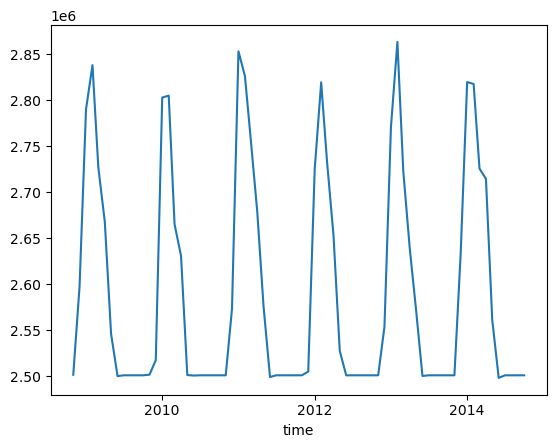

In [107]:
lh=ds.EFLX_LH_TOT
et = ds.QVEGE+ds.QSOIL+ds.QVEGT
et2 = ds.QFLX_EVAP_TOT
(lh/et).plot()
# (et/et2).plot()

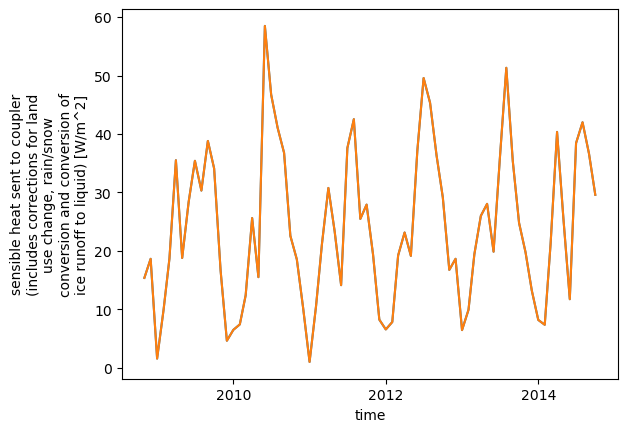

In [139]:
ds.FSH.plot()
# ds.FSH_G.plot()
# ds.FSH_V.plot()
# ds.FSH_PRECIP_CONVERSION.plot()
# ds.FSH_R.plot()
# ds.FSH_RUNOFF_ICE_TO_LIQ.plot()
ds.FSH_TO_COUPLER.plot()

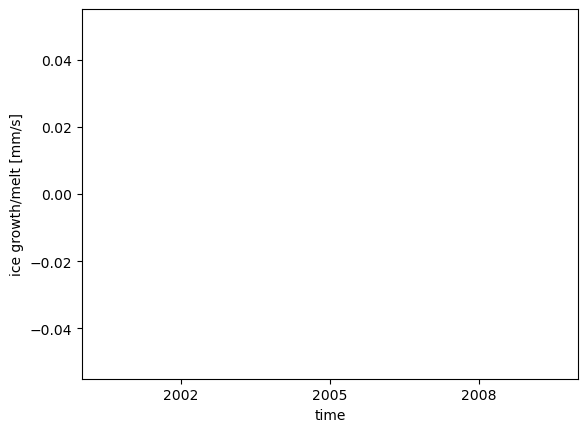

In [142]:
ds.QICE.plot()

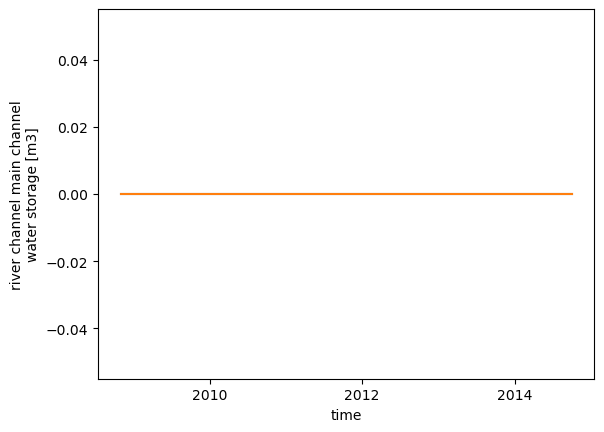

In [100]:
ds.VOLR.plot()
ds.VOLRMCH.plot()

In [115]:
# ds = xr.open_mfdataset(infilelist)
files=glob.glob('/glade/derecho/scratch/guoqiang/CTSM_outputs/CAMELS_Calib/Calib_HH_MOASMO/level1_0/archive/level1_0_clone/lnd/hist/*.h1*.nc')
files.sort()
ds=xr.open_mfdataset(files)

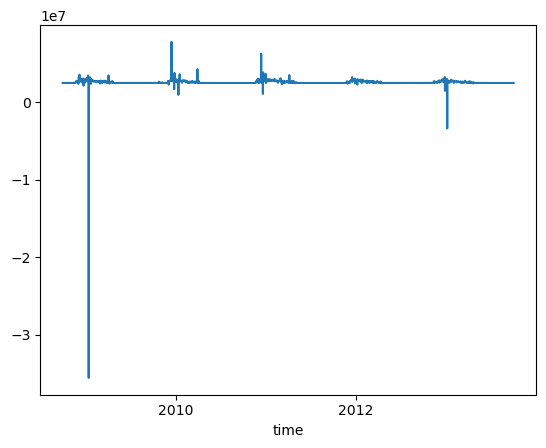

In [116]:
lh=ds.EFLX_LH_TOT
tbot=ds.TBOT
et = ds.QVEGE+ds.QSOIL+ds.QVEGT
# d = (lh/et).values
# d[d<0]=np.nan
# plt.plot(d)
(lh/et).plot()

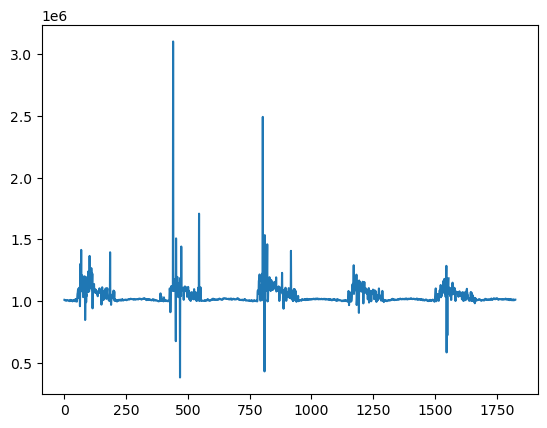

In [117]:
import matplotlib.pyplot as plt
lh=ds.EFLX_LH_TOT
tbot=ds.TBOT
et = ds.QVEGE+ds.QSOIL+ds.QVEGT
et_fromlh = lh/(2.501-(2.361*0.001)*(tbot-273.15))
d = (et_fromlh/et).values
d[d<0]=np.nan
plt.plot(d)

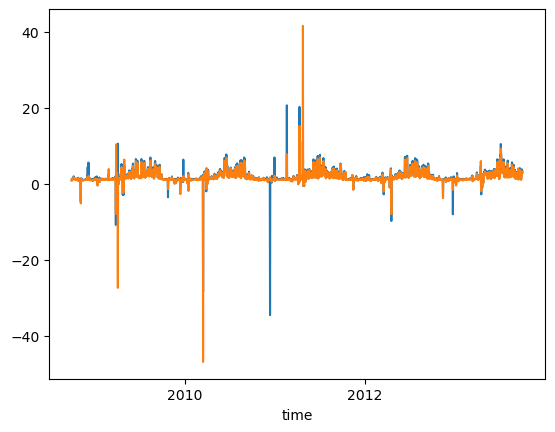

In [125]:
hvap=2.501e6
htvp=3.337e5+hvap

lh_from_qflx = hvap*ds.QSOIL+hvap*ds.QVEGE
(lh/lh_from_qflx).plot()

lh_from_qflx = htvp*ds.QSOIL+hvap*ds.QVEGE
(lh/lh_from_qflx).plot()

In [127]:
ds

<xarray.Dataset>
Dimensions:          (levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 1,
                      time: 1826, hist_interval: 2, lndgrid: 1)
Coordinates:
  * levgrnd          (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levsoi           (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.95 6.94 8.03
  * levlak           (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp          (levdcmp) float32 1.0
  * time             (time) object 2008-10-01 00:00:00 ... 2013-10-01 00:00:00
Dimensions without coordinates: hist_interval, lndgrid
Data variables: (12/32)
    mcdate           (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mcsec            (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mdcur            (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mscur            (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    nstep            (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    time_bounds      (time, hist_interval) object dask.array<chunksize=(365, 2), meta=np.ndarray>
    ...               ...
    SNOW             (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    SOILWATER_10CM   (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    TBOT             (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    TOTSOILLIQ       (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    TWS              (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    ZWT              (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
Attributes: (12/99)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/19/24 13:49:02
    source:                               Community Terrestrial Systems Model
    hostname:                             derecho
    ...                                   ...
    cft_irrigated_switchgrass:            60
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     day_1